In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mosapabdelghany/medical-insurance-cost-dataset")

print("Path to dataset files:", path)

d:\Documents\DATA SCIENCE WITH VS\UDEMY_BOOTCAMP\Machine_Learning-UDEMY\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 16.0k/16.0k [00:00<00:00, 5.48MB/s]

Extracting files...
Path to dataset files: C:\Users\pc\.cache\kagglehub\datasets\mosapabdelghany\medical-insurance-cost-dataset\versions\1


In [2]:
import os

# Path to the dataset folder
folder_path = r"C:\Users\pc\.cache\kagglehub\datasets\mosapabdelghany\medical-insurance-cost-dataset\versions\1"

# List all files in the folder
os.listdir(folder_path)


['insurance.csv']

In [4]:
import pandas as pd

In [8]:
import pandas as pd

file_path = r"C:\Users\pc\.cache\kagglehub\datasets\mosapabdelghany\medical-insurance-cost-dataset\versions\1\insurance.csv"

df = pd.read_csv(file_path)
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
df.shape

(1338, 7)

In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
import matplotlib.pyplot as plt

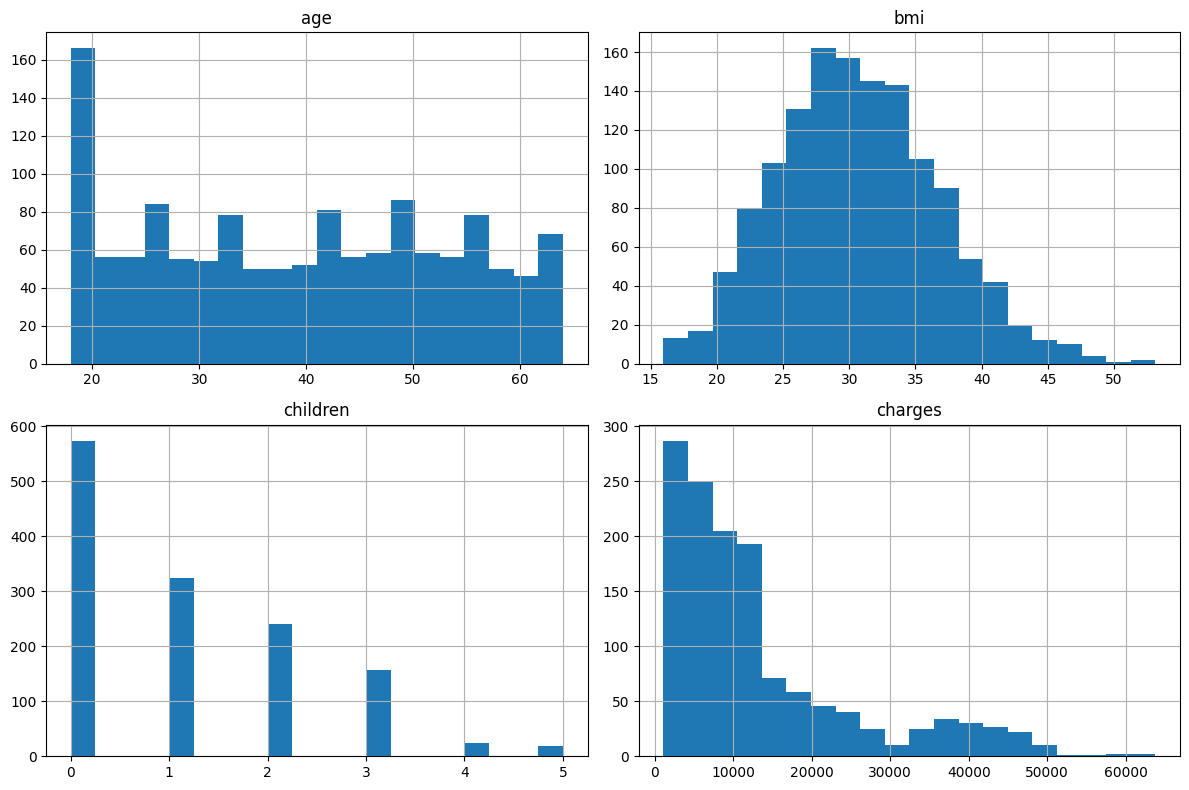

In [18]:
df.hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()

In [19]:
for col in ['sex','smoker','region']:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for sex:
sex
male      676
female    662
Name: count, dtype: int64

Value counts for smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

Value counts for region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_8244\2903887260.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='Set2')


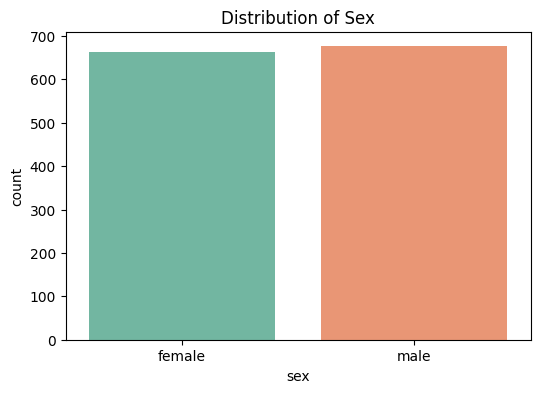

C:\Users\pc\AppData\Local\Temp\ipykernel_8244\2903887260.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='smoker', palette='Set1')


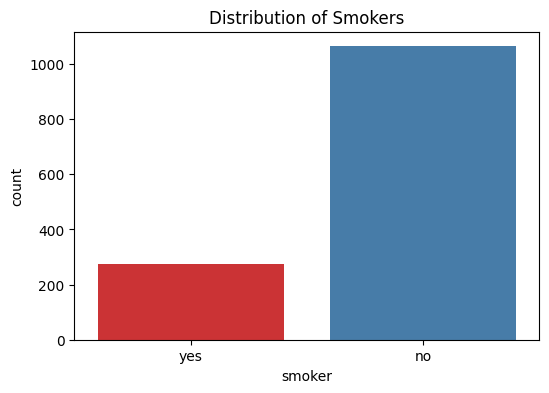

C:\Users\pc\AppData\Local\Temp\ipykernel_8244\2903887260.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='region', palette='Set3')


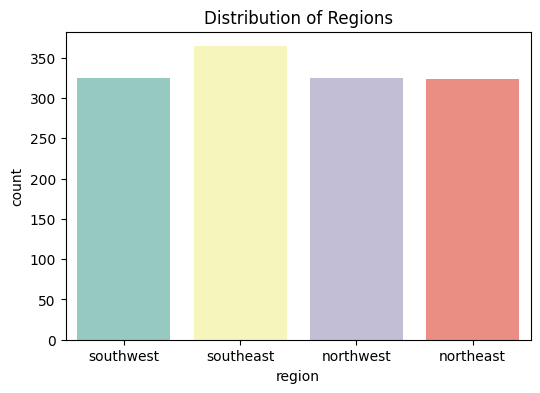

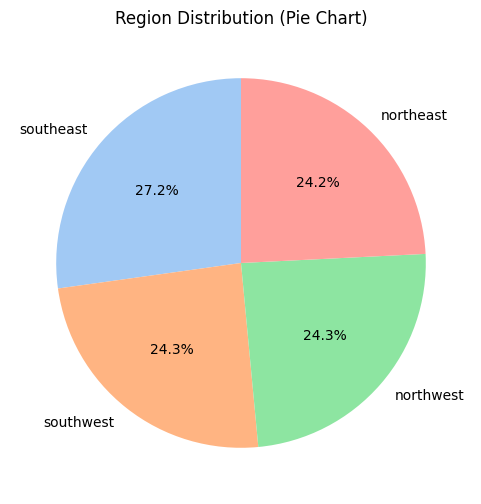

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sex distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex', palette='Set2')
plt.title("Distribution of Sex")
plt.show()

# 2. Smoker distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='smoker', palette='Set1')
plt.title("Distribution of Smokers")
plt.show()

# 3. Region distribution (bar)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='region', palette='Set3')
plt.title("Distribution of Regions")
plt.show()

# 4. Region distribution (pie chart)
plt.figure(figsize=(6,6))
df['region'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
plt.ylabel("")
plt.title("Region Distribution (Pie Chart)")
plt.show()


## Bivariate Analysis

Text(0.5, 1.0, 'Charges vs Age (colored by smoker)')

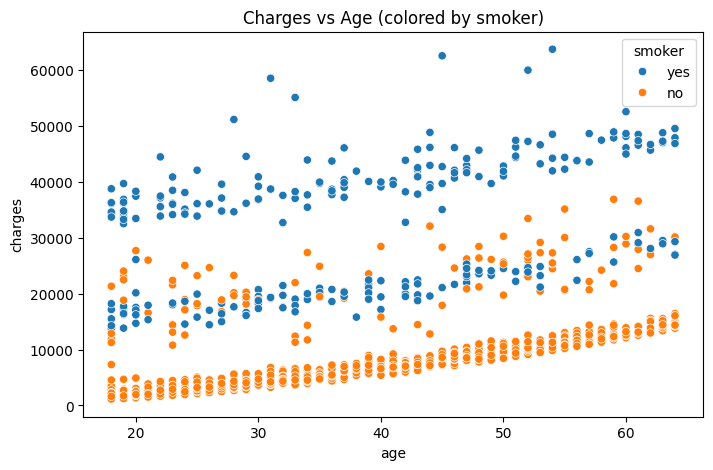

In [20]:
import seaborn as sns

#CHARGE VS AGE

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x = 'age', y='charges', hue='smoker')
plt.title('Charges vs Age (colored by smoker)')


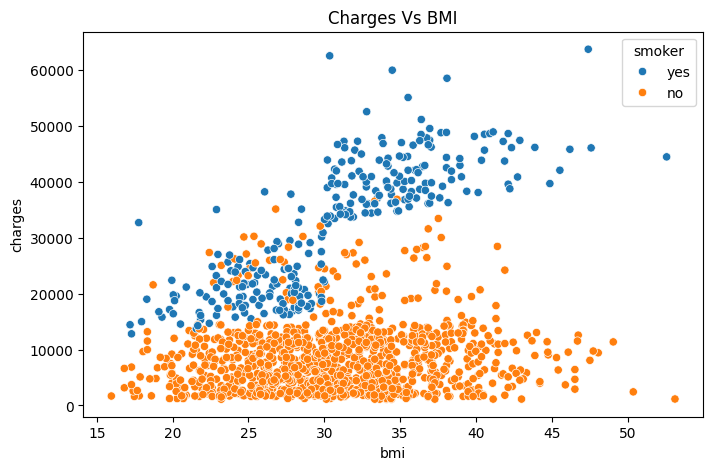

In [22]:
#charges by BMI


plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='bmi',y='charges',hue='smoker')
plt.title("Charges Vs BMI")
plt.show()

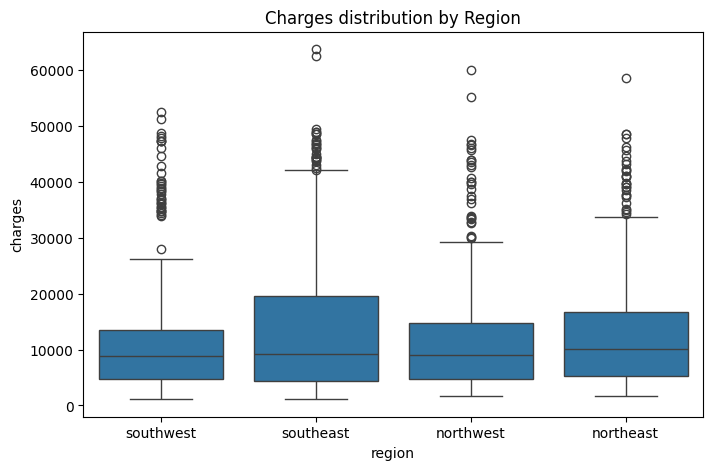

In [23]:
#charges by region

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='region', y='charges')
plt.title("Charges distribution by Region")
plt.show()

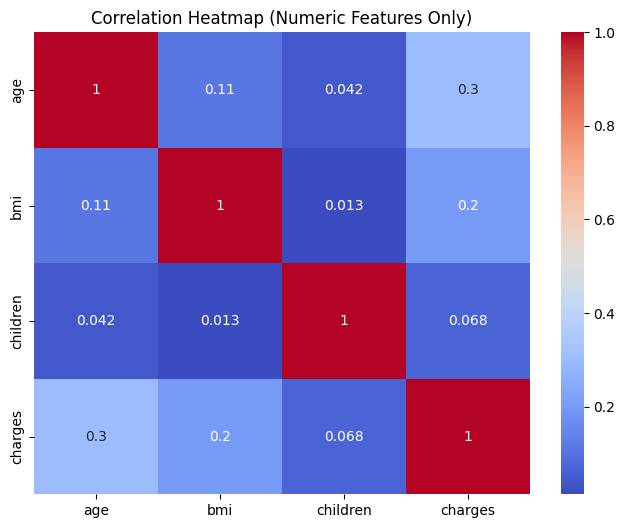

In [25]:

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

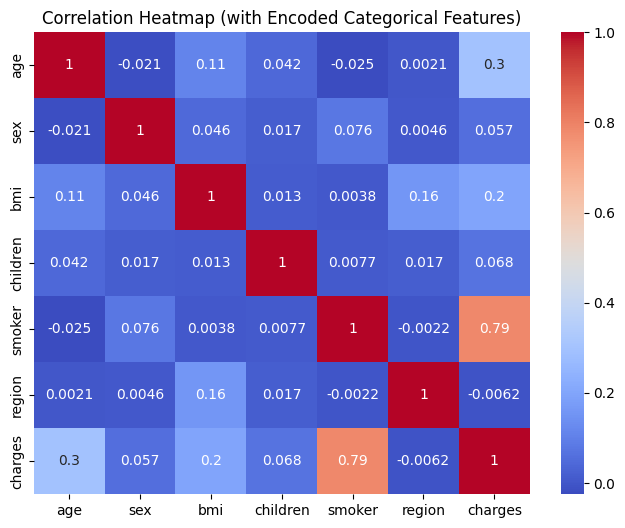

In [32]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataset
df_encoded = df.copy()

# Encode categorical columns
label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # store encoder if you want to inverse later

# Correlation heatmap with encoded categorical columns
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (with Encoded Categorical Features)")
plt.show()


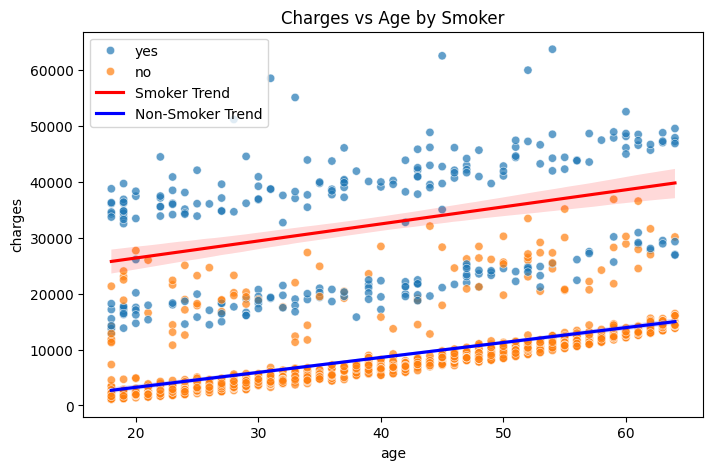

In [34]:
# 1. Age vs Charges by Smoker
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.7)
sns.regplot(data=df[df['smoker']=="yes"], x='age', y='charges', scatter=False, color='red', label='Smoker Trend')
sns.regplot(data=df[df['smoker']=="no"], x='age', y='charges', scatter=False, color='blue', label='Non-Smoker Trend')
plt.title("Charges vs Age by Smoker")
plt.legend()
plt.show()

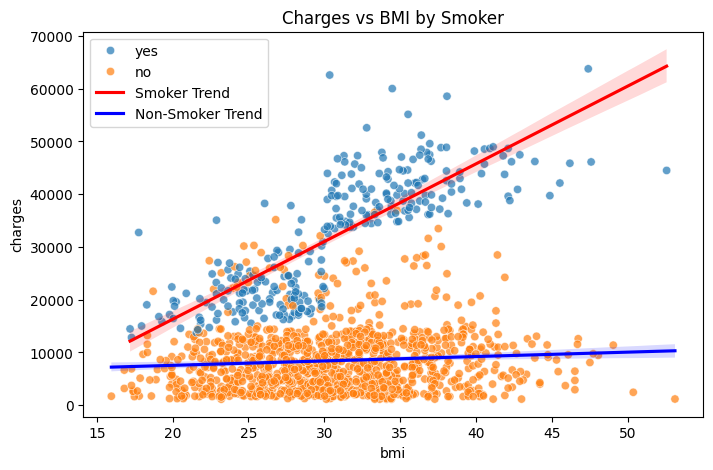

In [35]:
# 2. BMI vs Charges by Smoker
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.7)
sns.regplot(data=df[df['smoker']=="yes"], x='bmi', y='charges', scatter=False, color='red', label='Smoker Trend')
sns.regplot(data=df[df['smoker']=="no"], x='bmi', y='charges', scatter=False, color='blue', label='Non-Smoker Trend')
plt.title("Charges vs BMI by Smoker")
plt.legend()
plt.show()

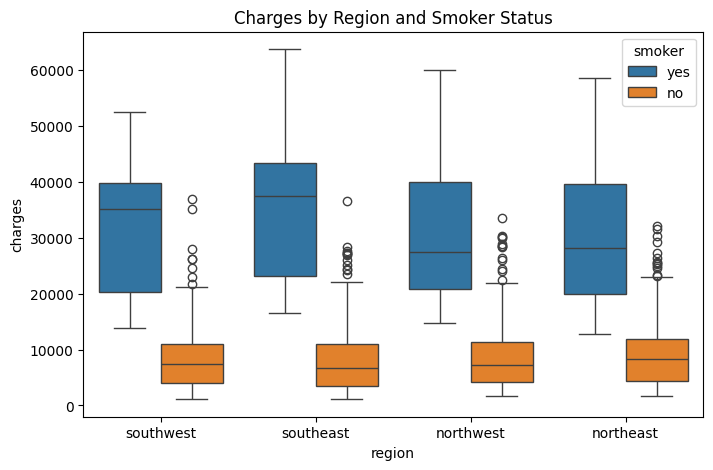

In [36]:
# 3. Region vs Charges by Smoker (grouped boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='region', y='charges', hue='smoker')
plt.title("Charges by Region and Smoker Status")
plt.show()

From the analysis - the smokers subscription tend to be high as compared to non-smokers.

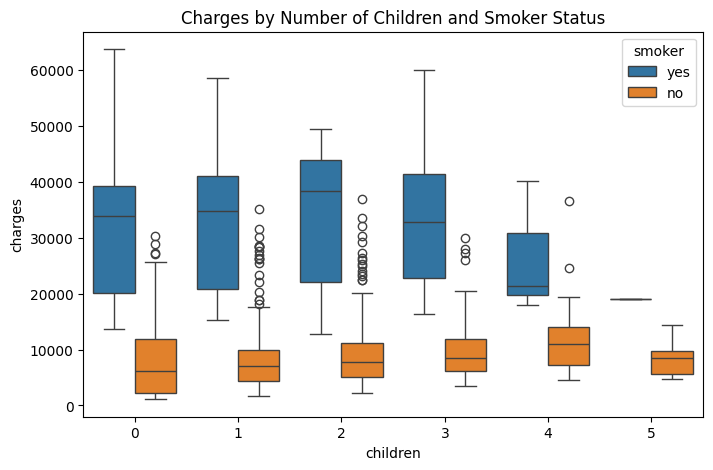

In [37]:
# Charges by Children and Smoker (grouped boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='children', y='charges', hue='smoker')
plt.title("Charges by Number of Children and Smoker Status")
plt.show()


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [39]:
X = df.drop("charges", axis=1)
y = df['charges']

In [40]:
#split the dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [41]:
#preprocessing

categorical_cols = ["sex", "smoker", "region"]
numeric_cols = ["age", "bmi", "children"]

In [43]:

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_cols),
        ("cat", OneHotEncoder(drop="first"), categorical_cols)
    ]
)

In [44]:
# 4. Linear Regression Model
# -----------------------------
linreg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

linreg_model.fit(X_train, y_train)
y_pred_lin = linreg_model.predict(X_test)

In [46]:
import numpy as np

In [47]:
# Evaluate Linear Regression
print("🔹 Linear Regression Performance:")
print("R²:", r2_score(y_test, y_pred_lin))
print("MAE:", mean_absolute_error(y_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))

🔹 Linear Regression Performance:
R²: 0.7835929767120723
MAE: 4181.194473753651
RMSE: 5796.2846592762735


In [48]:
# 5. Random Forest Model
# -----------------------------
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [49]:
# Evaluate Random Forest
print("\n🔹 Random Forest Performance:")
print("R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


🔹 Random Forest Performance:
R²: 0.8644756815249467
MAE: 2559.9014228678197
RMSE: 4586.935636079838


               Model  R2_Train   R2_Test    MAE_Train     MAE_Test  \
0  Linear Regression  0.741726  0.783593  4208.234572  4181.194474   
1      Random Forest  0.975169  0.864476  1047.761041  2559.901423   

    RMSE_Train    RMSE_Test  
0  6105.545160  5796.284659  
1  1893.130223  4586.935636  


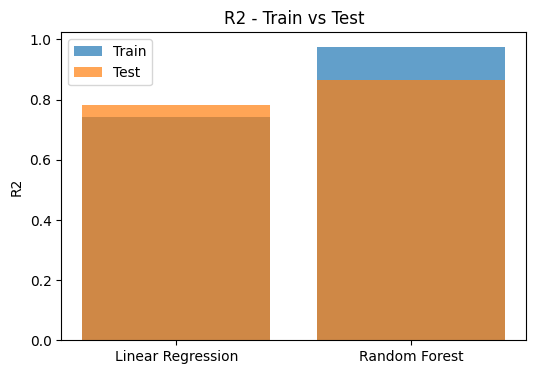

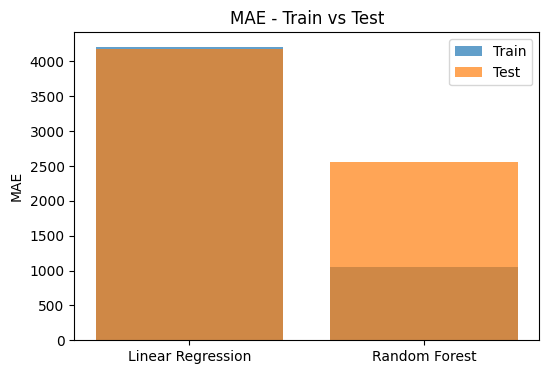

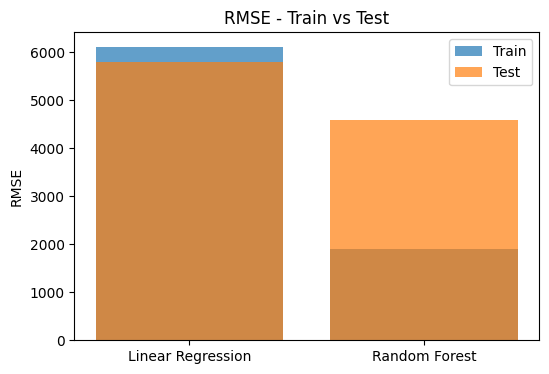

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics
    metrics = {
        "Model": model_name,
        "R2_Train": r2_score(y_train, y_pred_train),
        "R2_Test": r2_score(y_test, y_pred_test),
        "MAE_Train": mean_absolute_error(y_train, y_pred_train),
        "MAE_Test": mean_absolute_error(y_test, y_pred_test),
        "RMSE_Train": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "RMSE_Test": np.sqrt(mean_squared_error(y_test, y_pred_test)),
    }
    return metrics

# -----------------------------
# 1. Evaluate both models
# -----------------------------
results = []
results.append(evaluate_model(linreg_model, X_train, X_test, y_train, y_test, "Linear Regression"))
results.append(evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest"))

df_results = pd.DataFrame(results)
print(df_results)

# -----------------------------
# 2. Plot Metrics
# -----------------------------
metrics_to_plot = ["R2", "MAE", "RMSE"]

for metric in metrics_to_plot:
    plt.figure(figsize=(6,4))
    plt.bar(df_results["Model"], df_results[f"{metric}_Train"], alpha=0.7, label="Train")
    plt.bar(df_results["Model"], df_results[f"{metric}_Test"], alpha=0.7, label="Test")
    plt.ylabel(metric)
    plt.title(f"{metric} - Train vs Test")
    plt.legend()
    plt.show()


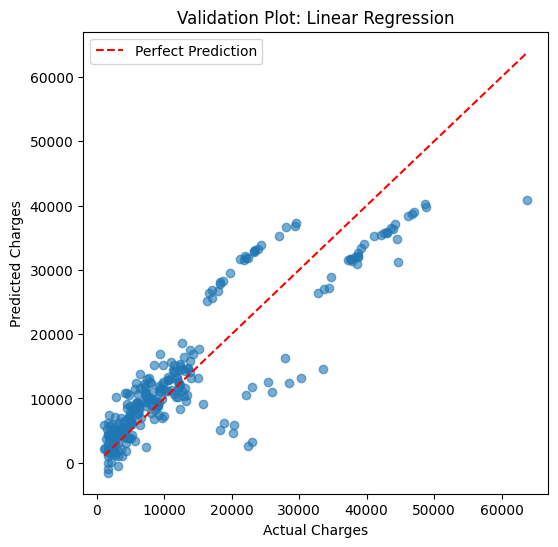

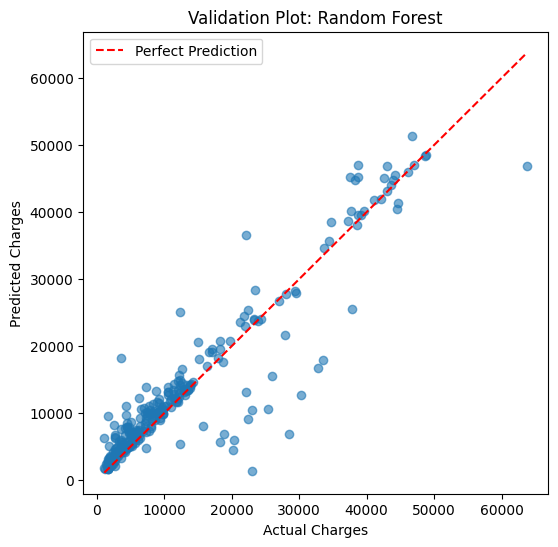

In [51]:
# Validation plot for model predictions
def plot_validation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             color="red", linestyle="--", label="Perfect Prediction")
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.title(f"Validation Plot: {model_name}")
    plt.legend()
    plt.show()

# Plot for both models
plot_validation(linreg_model, X_test, y_test, "Linear Regression")
plot_validation(rf_model, X_test, y_test, "Random Forest")
